In [1]:
import pandas as pd

In [28]:
from preprocessing import *

COVID_COLUMNS = [
    "iso_code",
    "date",
    "continent",
    "new_cases_per_million",
    "new_deaths_per_million",
    "total_vaccinations_per_hundred",
    "people_vaccinated_per_hundred",
    "population",
    "life_expectancy",
]

STRINGENCY_COLUMNS = [
    "C1_School closing",
    "C2_Workplace closing",
    "C3_Cancel public events",
    "C4_Restrictions on gatherings",
    "C5_Close public transport",
    "C6_Stay at home requirements",
    "C7_Restrictions on internal movement",
    "C8_International travel controls",
]

raw = load_covid_frame("./covid.csv", COVID_COLUMNS)

START = datetime(2021, 10, 26)
END = datetime(2021, 11, 26)

country_raw = average_over_date_range(
    raw, "iso_code", "date", START, END, is_covid=True
)

# Join GDP per Capita
country_raw = join_auxiliary_dataset(
    country_raw,
    "./data/gdp_per_capita_wb.csv",
    ["gdp_per_capita"],
    "Country Code",
    "..",
)

# Join Population ages 65+
country_raw = join_auxiliary_dataset(
    country_raw,
    "./data/65_above_share_wb.csv",
    ["population_ages_65_and_above"],
    "Country Code",
    "..",
)

# Join Population Density
country_raw = join_auxiliary_dataset(
    country_raw,
    "./data/pop_den_wb.csv",
    ["population_density"],
    "Country Code",
    "..",
)

# Join Stringency index attributes
stringency_raw = pd.read_csv("./data/stringency.csv")
stringency_daily_avg = average_over_date_range(
    stringency_raw, "CountryCode", "Date", START, END, date_format="%Y%m%d"
)
country_raw = join_auxiliary_dataset(
    country_raw,
    stringency_daily_avg,
    STRINGENCY_COLUMNS,
)

# Join the income group
country_raw = join_auxiliary_dataset(
    country_raw,
    './data/income_group_wb.csv',
    ["IncomeGroup"],
    aux_index_col="Country Code",
    is_numerical=False
)


/Users/tonywu/opt/miniconda3/envs/inst0060/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Load data

array([[<AxesSubplot:title={'center':'new_cases_per_million'}>,
        <AxesSubplot:title={'center':'new_deaths_per_million'}>,
        <AxesSubplot:title={'center':'total_vaccinations_per_hundred'}>,
        <AxesSubplot:title={'center':'people_vaccinated_per_hundred'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'life_expectancy'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>,
        <AxesSubplot:title={'center':'population_ages_65_and_above'}>],
       [<AxesSubplot:title={'center':'population_density'}>,
        <AxesSubplot:title={'center':'C1_School closing'}>,
        <AxesSubplot:title={'center':'C2_Workplace closing'}>,
        <AxesSubplot:title={'center':'C3_Cancel public events'}>],
       [<AxesSubplot:title={'center':'C4_Restrictions on gatherings'}>,
        <AxesSubplot:title={'center':'C5_Close public transport'}>,
        <AxesSubplot:title={'center':'C6_Stay at home requirements'}>,
        <AxesSubplot:ti

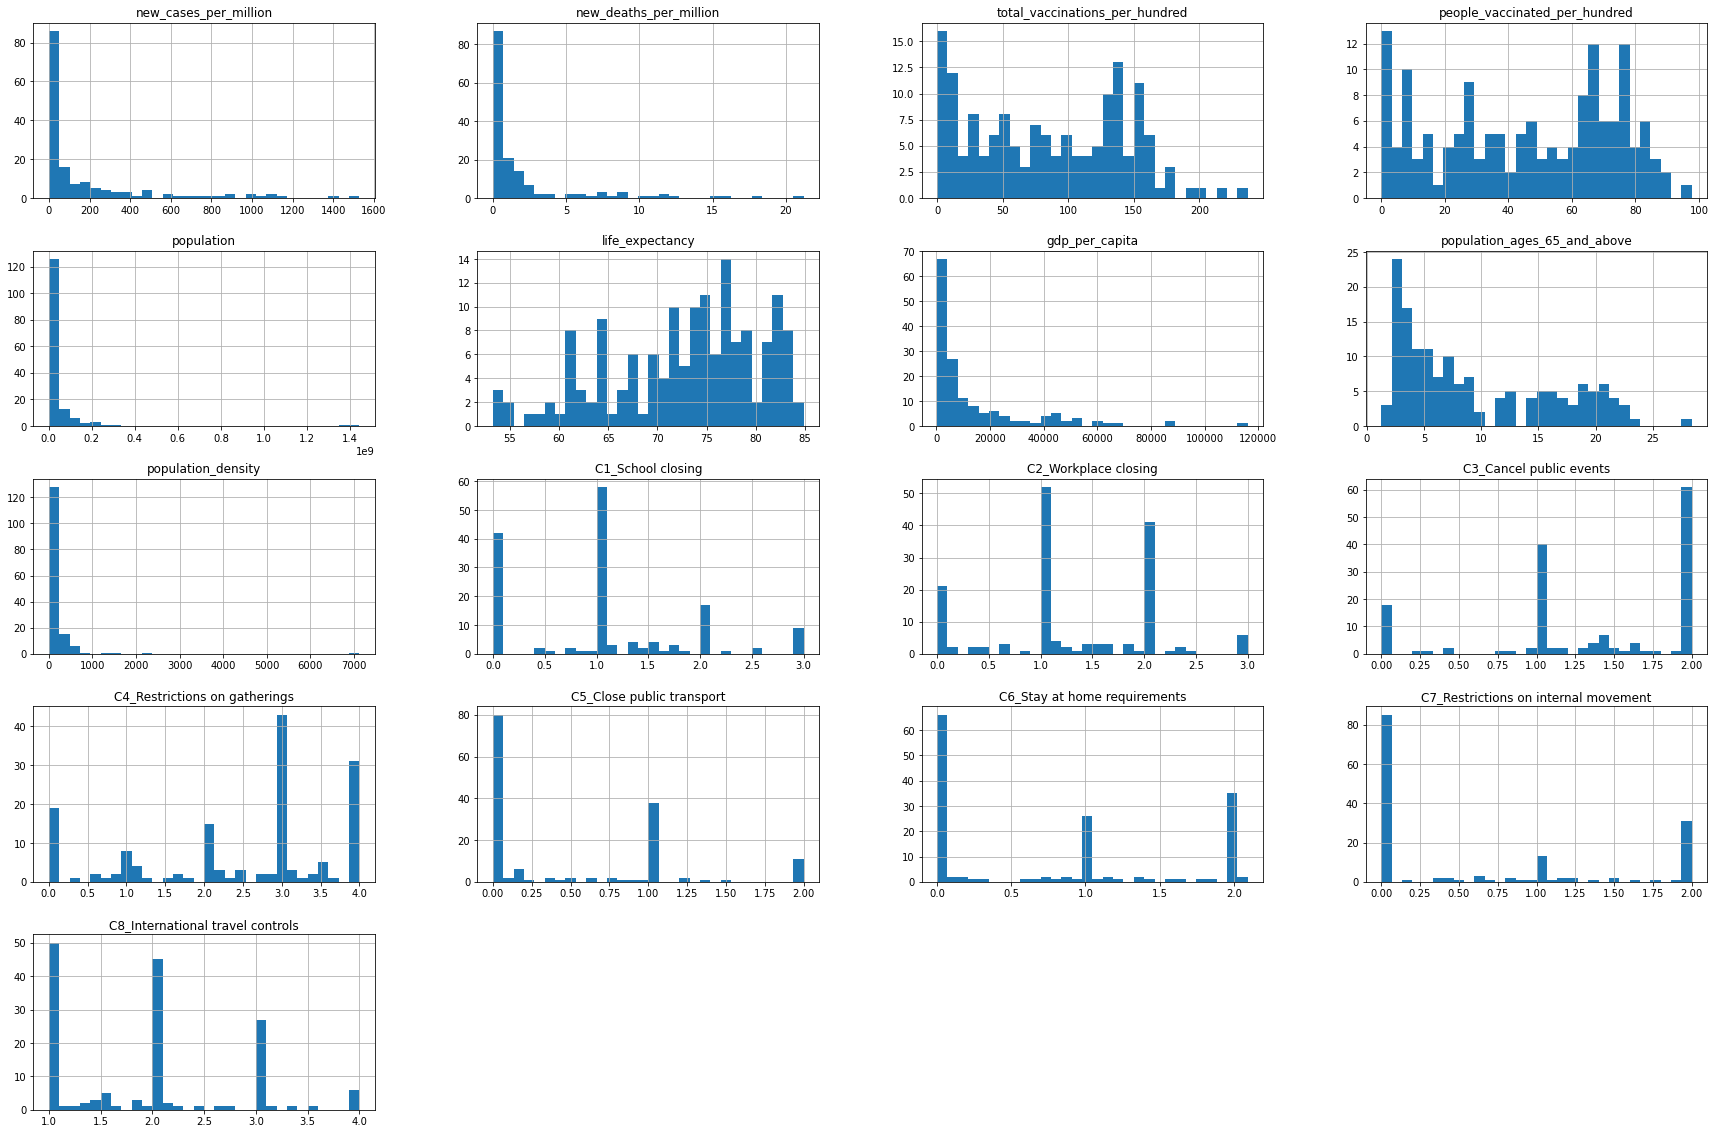

In [29]:
import matplotlib.pyplot as plt

country_raw.hist(bins=30, figsize=(30, 20))


array([[<AxesSubplot:title={'center':'new_cases_per_million'}>,
        <AxesSubplot:title={'center':'new_deaths_per_million'}>,
        <AxesSubplot:title={'center':'total_vaccinations_per_hundred'}>,
        <AxesSubplot:title={'center':'people_vaccinated_per_hundred'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'life_expectancy'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>,
        <AxesSubplot:title={'center':'population_ages_65_and_above'}>],
       [<AxesSubplot:title={'center':'population_density'}>,
        <AxesSubplot:title={'center':'C1_School closing'}>,
        <AxesSubplot:title={'center':'C2_Workplace closing'}>,
        <AxesSubplot:title={'center':'C3_Cancel public events'}>],
       [<AxesSubplot:title={'center':'C4_Restrictions on gatherings'}>,
        <AxesSubplot:title={'center':'C5_Close public transport'}>,
        <AxesSubplot:title={'center':'C6_Stay at home requirements'}>,
        <AxesSubplot:ti

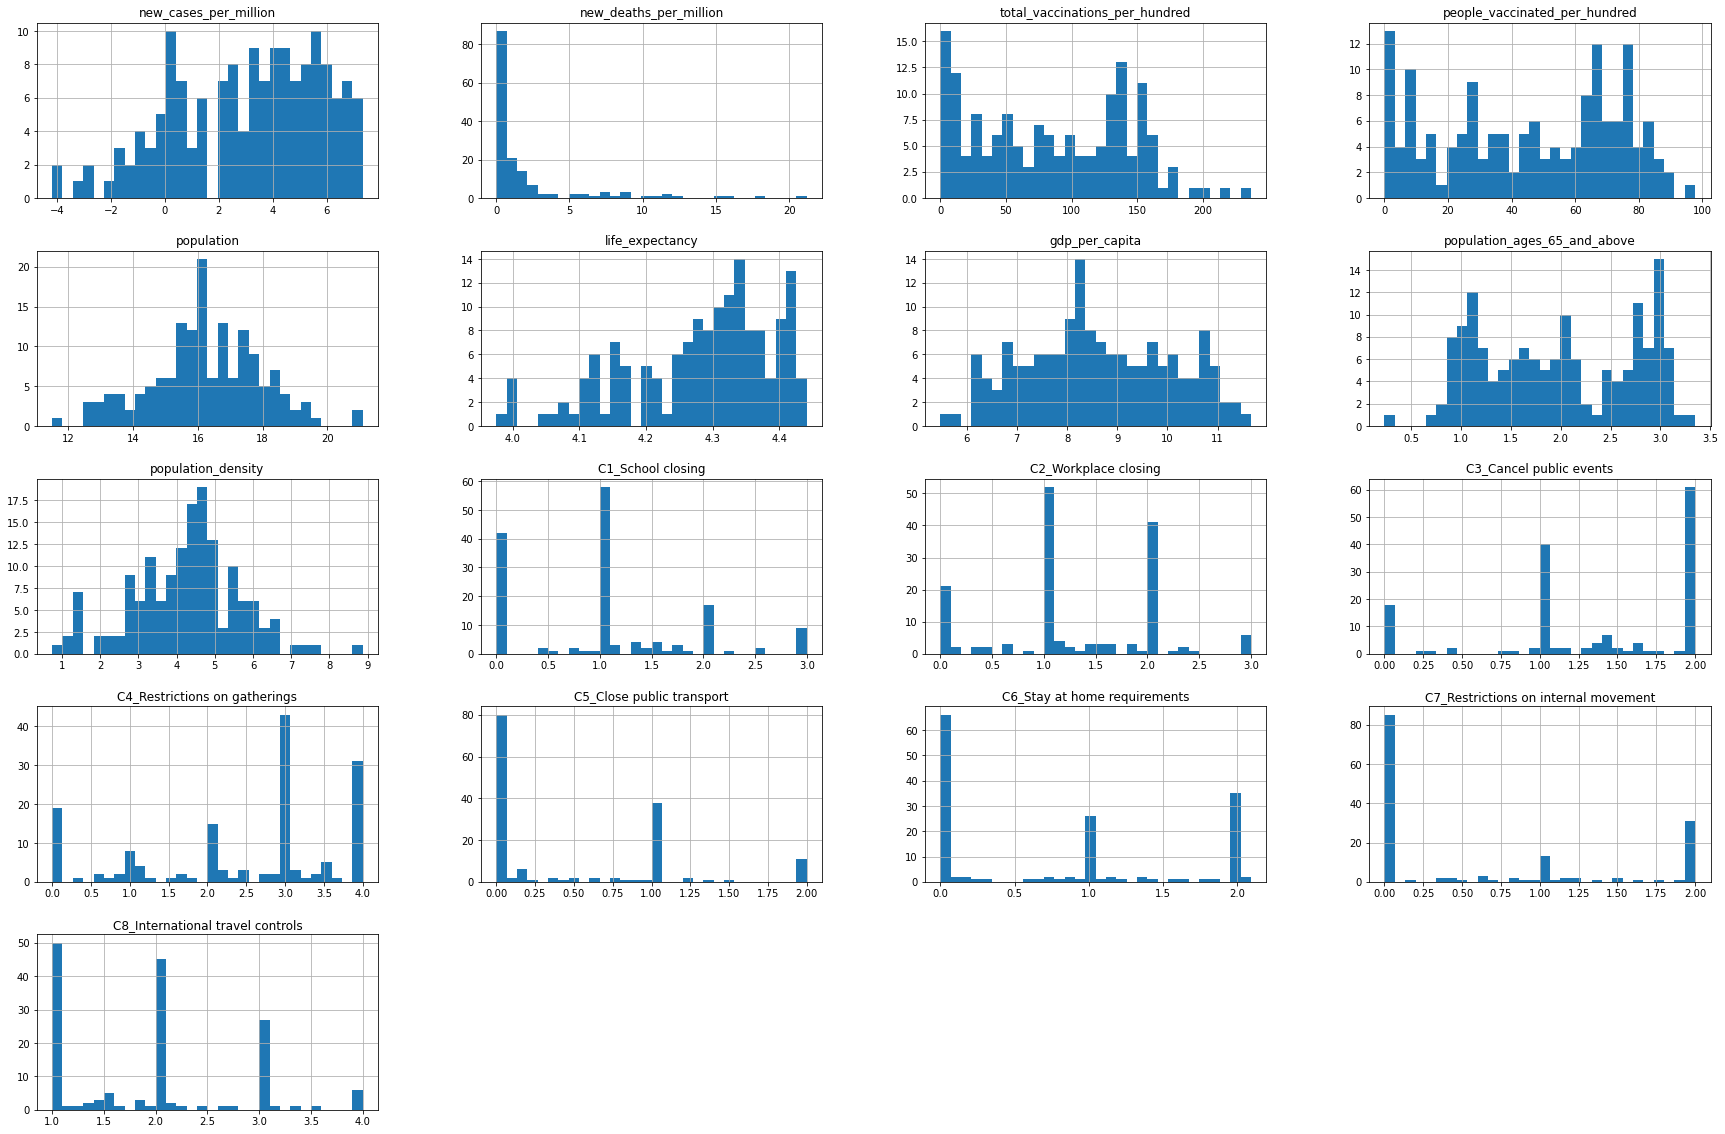

In [34]:
import numpy as np


COLS = [
        "new_cases_per_million",
        "population",
        "life_expectancy",
        "gdp_per_capita",
        "population_density",
        "population_ages_65_and_above",
    ]
country_log = country_raw.copy()
country_log[COLS] = np.log(country_log[COLS]) 

country_log.hist(bins=30, figsize=(30, 20))


In [ ]:
pd.options.display.max_rows = 4000

df.isna().sum()

continent                                      13
total_cases                                     4
new_cases                                       4
new_cases_smoothed                              4
total_deaths                                   18
new_deaths                                     18
new_deaths_smoothed                             4
total_cases_per_million                         5
new_cases_per_million                           5
new_cases_smoothed_per_million                  5
total_deaths_per_million                       19
new_deaths_per_million                         19
new_deaths_smoothed_per_million                 5
reproduction_rate                              47
icu_patients                                  203
icu_patients_per_million                      203
hosp_patients                                 199
hosp_patients_per_million                     199
weekly_icu_admissions                         215
weekly_icu_admissions_per_million             215


In [ ]:
df['location']

KeyError: 'location'